In [7]:
# Install packages (if needed)
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Generate sample stock data
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", end="2023-12-31", freq="B")
prices = np.cumsum(np.random.normal(loc=0.1, scale=2, size=len(dates))) + 150

stock = pd.DataFrame({
    "Date": dates,
    "Open": prices + np.random.normal(0, 1, len(prices)),
    "High": prices + np.random.normal(1, 2, len(prices)),
    "Low": prices - np.random.normal(1, 2, len(prices)),
    "Close": prices,
    "Volume": np.random.randint(1000000, 5000000, len(prices))
})
stock.set_index("Date", inplace=True)
stock.head()


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,151.054920,151.077148,150.916415,151.093428,1727467
2020-01-02,150.744272,151.621339,150.095368,150.916900,1455796
2020-01-03,153.195937,152.405780,151.387418,152.312277,3998851
2020-01-06,156.110659,159.363272,157.920739,155.458336,4661306
2020-01-07,153.513638,156.743519,151.100153,155.090030,3023969


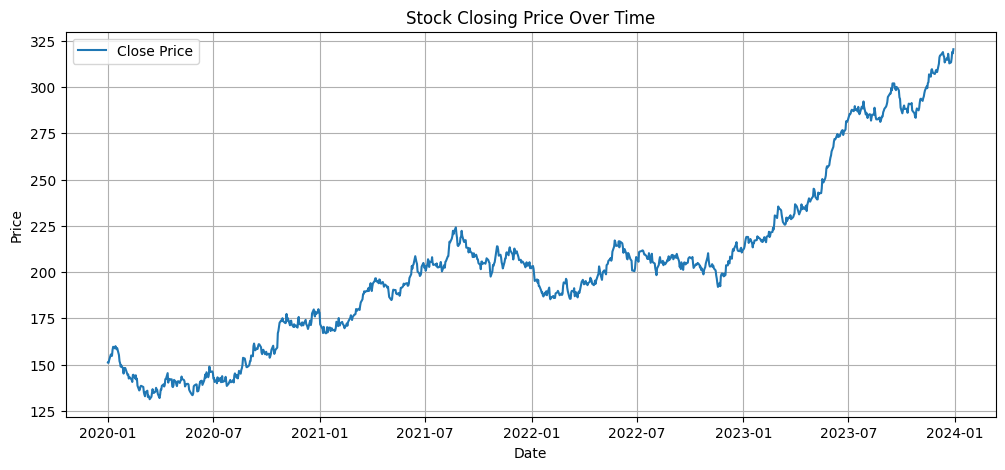

In [9]:
# Plot closing prices
plt.figure(figsize=(12,5))
plt.plot(stock["Close"], label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# ML modeling
X = stock[["Open", "High", "Low", "Volume"]]
y = stock["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Mean Squared Error (MSE): 0.7299841950144086
R² Score: 0.9996569499999917


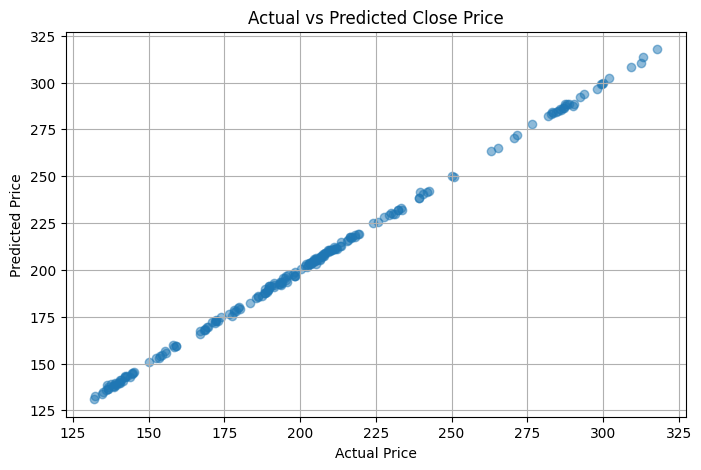

In [12]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Visualization of predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Close Price")
plt.grid(True)
plt.show()
